# Prime Gaps Plot

In [202]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
HEIGHT = 9*2
WIDTH = 16*2
SAVE = True
FILE_NAME = "primeplot.png"

## Calculate primes using the 'Sieve of Eratosthenes'-Algorithm

In [204]:
def sieve(n, end=None):
    """Returns a list of all primes smaller than n."""
    primes = [True for _ in range(n+1)]
    x = 1
    while(x**2 <= n):
        x+=1
        if primes[x]: 
            for i in range(len(primes))[x*2::x]:
                primes[i]=False
    return [p for p in range(2, n+1) if primes[p]]

In [205]:
n_primes = WIDTH*HEIGHT+1 # Number of primes needed for the plot. (+1 since we are intrested in the gaps)
x_estimate = n_primes*math.log(n_primes) # Estimate of how large the largest prime will be.
primes = sieve(int(x_estimate*1.2)) # Calculate a few more primes than estimted to be save.
primes = primes[:n_primes] # Cut off the primes that were calculated too many.

## Calculate gaps between primes

In [206]:
prime_gaps = []
for i in range(len(primes)-1):
    prime_gaps.append(primes[i+1] - primes[i])    

## Create plot 

Shape the array into an 2D-Array with the desired dimensions

In [207]:
data = np.reshape(np.array(prime_gaps), (HEIGHT, WIDTH))

Create plot using matplotlib and save the plot

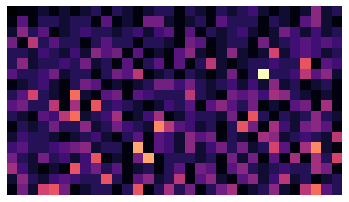

In [208]:
plt.figure(1)
plt.imshow(data, cmap="magma")
plt.axis('off')
if SAVE: 
    plt.savefig(FILE_NAME, dpi=900, transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

## Information

In [209]:
largest_gap = max(prime_gaps)
largest_prime = max(primes)
postition_of_largest_gap = prime_gaps.index(largest_gap)
primes_with_largest_gap = (primes[postition_of_largest_gap], primes[postition_of_largest_gap+1])

In [210]:
print(f"Number of primes: {len(primes)}\nLargest prime: {largest_prime}\nLargest gap: {largest_gap}\nGap between {primes_with_largest_gap[0]} and {primes_with_largest_gap[1]}")

Number of primes: 577
Largest prime: 4217
Largest gap: 34
Gap between 1327 and 1361
